In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [76]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('./u.user', sep='|', names=u_cols, encoding='latin-1')
users['user_sequential_id'] = pd.factorize(users['user_id'])[0] + 1
# users = users.set_index('user_id')
# print(users.head())
# u.itm 파일을 DataFrame으로 읽기
i_cols = ['movie_id', 'title', 'release date', 'video release date', 'IMDB URL', 
    'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 
    'Romance', 'Sci-fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('./u.item', sep='|', names=i_cols, encoding='latin-1')
movies['movie_sequential_id'] = pd.factorize(movies['movie_id'])[0] + 1
# movies = movies.set_index('movie_id')
# print(movies.head())

# u.data
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('./u.data', sep='\t', names=r_cols, encoding='latin-1')
# ratings = ratings.set_index('user_id')
# ratings.head()
# ratings['user_sequential_id'] = pd.factorize(ratings['user_id'])[0] + 1
# ratings['movie_sequential_id'] = pd.factorize(ratings['movie_id'])[0] + 1
ratings = pd.merge(ratings, users[['user_id', 'user_sequential_id']], on='user_id', how='left')
ratings = pd.merge(ratings, movies[['movie_id', 'movie_sequential_id']], on='movie_id', how='left')
# remove timestamp
# ratings = ratings.drop('timestamp', axis=1)
print(ratings.head())


# remove all except movie id and title
movies = movies[['movie_id', 'title']]
# movies.head()

   user_id  movie_id  rating  timestamp  user_sequential_id  \
0      196       242       3  881250949                 196   
1      186       302       3  891717742                 186   
2       22       377       1  878887116                  22   
3      244        51       2  880606923                 244   
4      166       346       1  886397596                 166   

   movie_sequential_id  
0                  242  
1                  302  
2                  377  
3                   51  
4                  346  


In [77]:
X = ratings[['user_sequential_id', 'movie_sequential_id', 'rating']].copy() # deep copy
y = ratings['user_sequential_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [78]:
def RMSE(y_true, y_pred): # root mean square error
    return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))

def score(model):
    id_pairs = zip(X_test['user_sequential_id'], X_test['movie_sequential_id'])
    y_pred = np.array([model(user, movie) for (user, movie) in id_pairs])
    y_true = np.array(X_test['rating'])
    # print('------start-------')
    # print(f"{X_test['user_sequential_id']}")
    # print(f"{X_test['movie_sequential_id']}")
    # print(f"{y_pred}: {y_true}")
    # print('------end-------')
    return RMSE(y_true, y_pred)

rating_matrix = X_train.pivot(index='user_sequential_id', columns='movie_sequential_id', values='rating')
print(rating_matrix)

movie_sequential_id  1     2     3     4     5     6     7     8     9     \
user_sequential_id                                                          
1                     5.0   3.0   NaN   3.0   3.0   5.0   NaN   1.0   5.0   
2                     4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3                     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4                     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5                     4.0   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
939                   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   5.0   
940                   NaN   NaN   NaN   NaN   NaN   NaN   4.0   5.0   3.0   
941                   NaN   NaN   NaN   NaN   NaN   NaN   4.0   NaN   NaN   
942                   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
943                   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   3.0   

In [79]:
rating_matrix_t = np.transpose(rating_matrix)

In [80]:
rating_matrix_t.head()

user_sequential_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_sequential_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='user_sequential_id', ylabel='movie_sequential_id'>

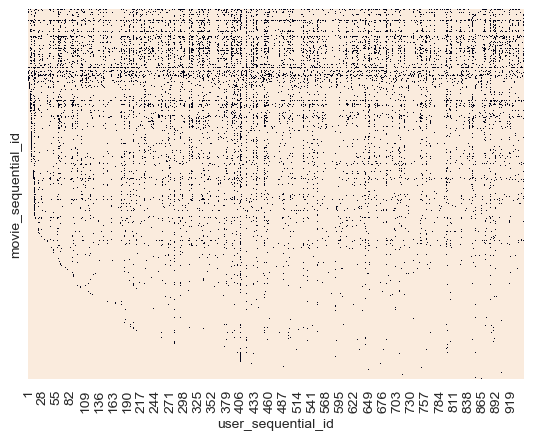

In [81]:
sns.heatmap(rating_matrix_t.isnull(), yticklabels=False, cbar=False)

In [82]:
# train set의 모든 가능한 사용자 pair의 cosine similarities를 계산
matrix_dummy = rating_matrix_t.copy().fillna(0)

In [83]:
matrix_dummy.head()

user_sequential_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_sequential_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot: xlabel='user_sequential_id', ylabel='movie_sequential_id'>

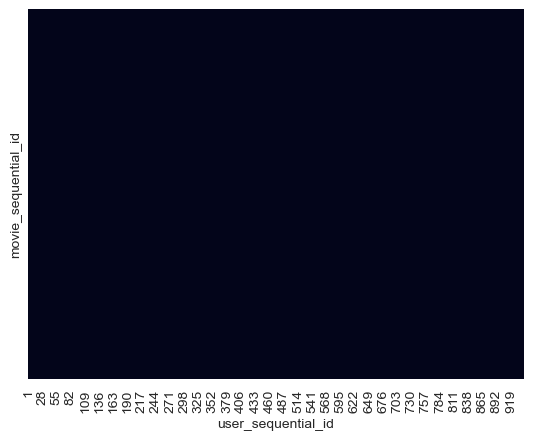

In [84]:
sns.heatmap(matrix_dummy.isnull(), yticklabels=False, cbar=False)

In [85]:
item_similarity = cosine_similarity(matrix_dummy, matrix_dummy)

In [86]:
item_similarity[0]

array([1.        , 0.28105634, 0.22191607, ..., 0.        , 0.05446337,
       0.        ])

In [87]:
# user가 movie에 대한 선호도를 나타낸다
# 사람은 943명이고 영호는 1600개이다
# 한사람의 전체 영화에 대한 선호도는 1600개이며, 이에 대한 코사인 유사도는 943 * 943개이다

len(item_similarity[0])

1642

In [88]:
item_similarity = pd.DataFrame(item_similarity, index=rating_matrix_t.index, columns=rating_matrix_t.index)

In [89]:
item_similarity.head()

movie_sequential_id,1,2,3,4,5,6,7,8,9,10,...,1672,1673,1674,1675,1676,1677,1678,1679,1681,1682
movie_sequential_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.281056,0.221916,0.333257,0.225180,0.097673,0.459647,0.350915,0.384940,0.201198,...,0.038511,0.040848,0.0,0.0,0.0,0.040848,0.0,0.0,0.054463,0.000000
2,0.281056,1.000000,0.236754,0.403649,0.222153,0.048805,0.249979,0.192959,0.185280,0.109562,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.092981
3,0.221916,0.236754,1.000000,0.218238,0.167388,0.016424,0.289712,0.155844,0.207528,0.115468,...,0.000000,0.000000,0.0,0.0,0.0,0.035202,0.0,0.0,0.000000,0.105605
4,0.333257,0.403649,0.218238,1.000000,0.267946,0.057751,0.369469,0.343343,0.322423,0.144650,...,0.000000,0.000000,0.0,0.0,0.0,0.043053,0.0,0.0,0.000000,0.086106
5,0.225180,0.222153,0.167388,0.267946,1.000000,0.046901,0.254273,0.186581,0.241348,0.052334,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.104893


In [90]:
# 주어진 영화의 (movie_id) 가중평균 rating을 계산하는 함수, 
# 가중치는 주어진 사용자와 다른 사용자 간의 유사도(user_similarity)
def CF_IBCF(user_sequential_id, movie_sequential_id):
    if movie_sequential_id in item_similarity:
        sim_scores = item_similarity[movie_sequential_id].copy()
        user_rating = rating_matrix_t[user_sequential_id].copy()
        none_rating_idx = user_rating[user_rating.isnull()].index
        user_rating = user_rating.dropna()
        sim_scores = sim_scores.drop(none_rating_idx)
        mean_rating = np.dot(sim_scores, user_rating) / sim_scores.sum()
    else:
        mean_rating = 3.0
    return mean_rating

In [91]:
# 정확도 계산
score(CF_IBCF)

------start-------
16965    130
40384    392
99863    707
73784    551
19770    406
        ... 
30294    495
82891    615
35238    523
33534    507
71808    934
Name: user_sequential_id, Length: 25000, dtype: int64
16965    1136
40384     257
99863     864
73784     209
19770     511
         ... 
30294    1183
82891    1065
35238     794
33534     271
71808     229
Name: movie_sequential_id, Length: 25000, dtype: int64
[4.144888   3.92745534 3.52643979 ... 4.27940561 4.8452238  3.82070833]: [4 5 4 ... 4 5 4]
------end-------


1.0104928987405097

In [98]:
def recommender(ratings, user_id, n_items=10):
    predictions = []
    user_sequential_id = ratings.loc[ratings['user_id'] == user_id, 'user_sequential_id'].iloc[0]
    print(f"user_sequential_id: {user_sequential_id},  user_id: {user_id}")
    rated_index = rating_matrix.loc[user_sequential_id][rating_matrix.loc[user_sequential_id] > 0].index # 현재 사용자가 이미 본 영화들의 인덱스
    items = rating_matrix.loc[user_sequential_id].drop(rated_index)
    for item_sequential_id in items.index:
        print(f"item_sequential_id: {item_sequential_id}")
        predictions.append(CF_IBCF(user_sequential_id, item_sequential_id))
    # print(predictions)
    recommendations = pd.Series(data=predictions, index=items.index, dtype=float)
    recommendations = recommendations.sort_values(ascending=False).iloc[:n_items]
    # print(ratings.head(5))
    print(recommendations)
    recommended_items = movies.loc[recommendations.index]['title']
    return recommended_items

In [99]:
recommender(ratings, user_id=2, n_items=5)

user_sequential_id: 2,  user_id: 2
item_sequential_id: 2
item_sequential_id: 3
item_sequential_id: 4
item_sequential_id: 5
item_sequential_id: 6
item_sequential_id: 7
item_sequential_id: 8
item_sequential_id: 9
item_sequential_id: 11
item_sequential_id: 12
item_sequential_id: 15
item_sequential_id: 16
item_sequential_id: 17
item_sequential_id: 18
item_sequential_id: 20
item_sequential_id: 21
item_sequential_id: 22
item_sequential_id: 23
item_sequential_id: 24
item_sequential_id: 26
item_sequential_id: 27
item_sequential_id: 28
item_sequential_id: 29
item_sequential_id: 30
item_sequential_id: 31
item_sequential_id: 32
item_sequential_id: 33
item_sequential_id: 34
item_sequential_id: 35
item_sequential_id: 36
item_sequential_id: 37
item_sequential_id: 38
item_sequential_id: 39
item_sequential_id: 40
item_sequential_id: 41
item_sequential_id: 42
item_sequential_id: 43
item_sequential_id: 44
item_sequential_id: 45
item_sequential_id: 46
item_sequential_id: 47
item_sequential_id: 48
item_se

movie_sequential_id
1455    Beat the Devil (1954)
1593           Everest (1998)
1536              Cosi (1996)
1104         Firestorm (1998)
711            Tin Men (1987)
Name: title, dtype: object